In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pprint import pprint
%matplotlib inline

### Semivariogram

In [37]:
import skgstat as skg

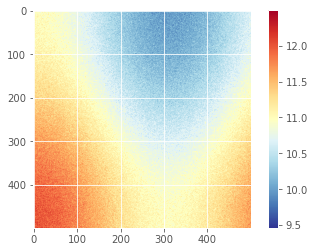

In [34]:
xx, yy = np.mgrid[0:0.5 * np.pi:500j, 0:0.8 * np.pi:500j]
np.random.seed(42)
_field = np.sin(xx)**2 + np.cos(yy)**2 + 10
np.random.seed(42)

z = _field + np.random.normal(0, 0.15, (500,  500))

plt.imshow(z, cmap='RdYlBu_r')
plt.colorbar()

In [35]:
z

array([[11.07450712, 10.97923499, 11.09705181, ..., 10.61634677,
        10.51836789, 10.44708854],
       [11.13893654, 11.28639704, 10.79012331, ..., 10.74103391,
        10.56404369, 10.74040582],
       [11.20994295, 11.13870932, 11.00888272, ..., 10.82619214,
        10.80335964, 10.74342718],
       ...,
       [11.99249839, 12.20544268, 11.90934856, ..., 11.58704933,
        11.75103675, 11.82565966],
       [11.98041307, 12.06371632, 12.33568756, ..., 11.70268617,
        11.84348668, 11.73092668],
       [12.0986655 , 12.19899235, 11.70612783, ..., 11.66564715,
        11.43543437, 11.34271908]])

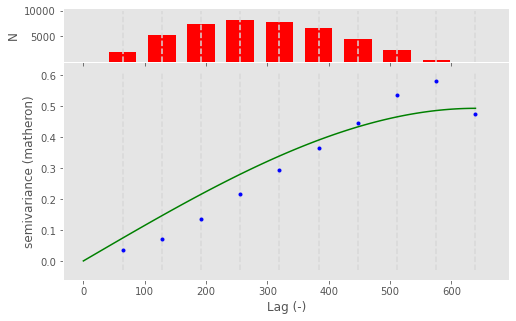

In [42]:
np.random.seed(42)

coords = np.random.randint(0, 500, (300, 2))
values = np.fromiter((z[c[0], c[1]] for c in coords), dtype=float)
V = skg.Variogram(coords, values)
V.plot().savefig('d.png')

In [43]:
coords.shape

(300, 2)

In [44]:
values.shape

(300,)

### Moran's I

In [2]:
import pysal
import libpysal as lps
from pysal.explore import esda

C:\Users\lida\Anaconda3\envs\mlsat\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
C:\Users\lida\Anaconda3\envs\mlsat\lib\site-packages\spaghetti\network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [24]:
f = pysal.lib.io.open(lps.examples.get_path("stl_hom.txt"))
y = np.array(f.by_col['HR8893'])

In [25]:
w = pysal.lib.io.open(lps.examples.get_path("stl.gal")).read()

In [42]:
f

DataTable: C:\Users\lida\Anaconda3\envs\ch\lib\site-packages\libpysal\examples\stl\stl_hom.txt

In [39]:
y

array([ 1.624458,  2.255492,  1.46789 ,  2.484256,  0.      ,  9.048673,
        6.029489,  1.800385,  4.581251,  3.790607,  1.447436,  1.191966,
        0.      ,  1.608017,  1.949812,  0.74509 ,  4.173318,  3.783252,
        2.085136,  2.176302,  6.309347, 10.855743,  4.211354,  0.80481 ,
        3.215331,  2.833664,  1.59204 ,  1.571158,  3.12759 ,  4.416896,
        3.017486,  9.924245,  7.973957,  5.005464,  2.463891,  0.      ,
        7.377974,  1.003875,  3.190047, 45.905406,  2.447597,  1.294958,
        5.933098,  4.133997,  4.298311, 27.483827,  0.969791,  0.      ,
        2.934466,  4.456427,  4.629264,  4.941533,  3.990041,  2.064324,
        3.040253,  3.905411,  4.332839,  3.894111,  6.828794,  3.263947,
        3.282163,  3.295762,  7.249679,  3.041846,  1.618018,  4.910801,
        1.991457,  3.146192,  7.26665 ,  3.110904,  2.980271,  3.866767,
        1.868408, 12.577034,  7.803599,  3.47149 ,  4.334822,  8.451537])

In [46]:
w.neighbors

{'1': ['7', '3', '6'],
 '2': ['10', '8', '5'],
 '3': ['7', '4', '1'],
 '4': ['9', '5', '3', '7'],
 '5': ['10', '4', '9', '2'],
 '6': ['16', '12', '11', '7', '1'],
 '7': ['19', '9', '11', '18', '1', '6', '3', '4'],
 '8': ['15', '10', '2'],
 '9': ['20', '19', '13', '10', '7', '4', '5'],
 '10': ['17', '15', '9', '13', '20', '21', '5', '2', '8'],
 '11': ['18', '16', '6', '7'],
 '12': ['16', '14', '6'],
 '13': ['20', '9', '10'],
 '14': ['22', '16', '12'],
 '15': ['23', '10', '17', '8'],
 '16': ['28', '27', '18', '22', '14', '12', '6', '11'],
 '17': ['30', '26', '23', '21', '10', '15'],
 '18': ['33', '32', '19', '16', '27', '11', '7'],
 '19': ['24', '20', '18', '33', '7', '9'],
 '20': ['24', '21', '19', '9', '13', '10'],
 '21': ['35', '26', '24', '20', '17', '10'],
 '22': ['29', '28', '14', '16'],
 '23': ['31', '25', '17', '30', '15'],
 '24': ['35', '33', '21', '19', '20'],
 '25': ['42', '31', '23'],
 '26': ['34', '30', '21', '35', '17'],
 '27': ['41', '39', '32', '28', '36', '16', '18'],
 '

In [31]:
moran_stat = esda.Moran(y, w)

In [33]:
moran_stat

In [35]:
moran_stat.I, moran_stat.EI, moran_stat.p_sim, moran_stat.EI_sim, moran_stat.z_sim, moran_stat.p_z_sim

(0.24365582621771695,
 -0.012987012987012988,
 0.002,
 -0.01370759971739956,
 4.792816814632003,
 8.222788830947181e-07)

### Try on satellite images

In [9]:
import rasterio
import shapely
import geopandas as gpd

In [27]:
train_labels = gpd.read_file('../data/train_labels/train_labels.shp')

CRSError: Invalid projection: epsg:4326: (Internal Proj Error: proj_create: no database context specified)

In [28]:
import skimage

def load_geotiff(path, window=None, as_float=True):
    """ Load the geotiff as a list of numpy array.
        INPUT : path (str) -> the path to the geotiff
                window (rasterio.windows.Window) -> the window to use when loading the image
        OUTPUT : band (list of numpy array) -> the different bands unscaled
                 meta (dictionary) -> the metadata associated with the geotiff
    """
    with rasterio.open(path) as f:
        if as_float:
            band = [skimage.img_as_float(f.read(i + 1, window=window)) for i in range(f.count)]
        else:  # as uint
            band = [f.read(i + 1, window=window) for i in range(f.count)]
        meta = f.meta
        if window is not None:
            meta['height'] = window.height
            meta['width'] = window.width
            meta['transform'] = f.window_transform(window)
    return band, meta

In [29]:
pred_path = '../preds/1117-000525_svc.tiff'
dataset_path1 = '../data/gfsad_clipped.tiff'
dataset_path2 = '../data/copernicus_clipped.tiff'
band_pred, meta_pred = load_geotiff(pred_path, as_float=False)
band_dataset1, meta_dataset1 = load_geotiff(dataset_path1, as_float=False)
band_dataset2, meta_dataset2 = load_geotiff(dataset_path2, as_float=False)

In [30]:
np.unique(band_pred[0])

array([2, 3], dtype=uint8)

In [31]:
np.unique(band_dataset1[0])

array([0, 1, 2], dtype=uint8)

In [26]:
np.unique(band_dataset2[0])

array([ 20,  30,  40,  50,  60,  70,  80,  90, 111, 112, 116, 121, 122,
       126, 255], dtype=uint8)

build neighbors

In [95]:
import math 

def get_neighbors(idx, ids, height, width):
    if idx not in ids:
        ids += [idx]
    points = np.arange(height*width).reshape(height, width)
    row, col = np.where(points == idx)
    row, col = row[0], col[0]
    if row == 0:
        row_start, row_end = row, row+2
    elif row == height-1:
        row_start, row_end = row-1, None
    else:
        row_start, row_end = row-1, row+2
    if col == 0:
        col_start, col_end = col, col+2
    elif col == width-1:
        col_start, col_end = col-1, None
    else:
        col_start, col_end = col-1, col+2 
    grid3x3 = points[row_start:row_end, col_start:col_end].reshape(-1)
    neighbors = [p for p in grid3x3 if p in ids and p != idx]
    return neighbors 
    

In [97]:
get_neighbors(16, [5,7,22,2,16,25], 10, 10)

[ 5  6  7 15 16 17 25 26 27]
[5, 7, 25]


[5, 7, 25]

In [56]:
np.where(np.arange(100).reshape(10,10) == 16)

(array([1], dtype=int64), array([6], dtype=int64))

In [98]:
import pandas as pd

In [102]:
get_neighbors(16, pd.DataFrame(np.arange(50)).index, 10, 10)

[ 5  6  7 15 16 17 25 26 27]
[5, 6, 7, 15, 17, 25, 26, 27]


[5, 6, 7, 15, 17, 25, 26, 27]

In [108]:
(pd.DataFrame(np.arange(50), columns=['d']).d == 1).index[0]

0

In [109]:
df = pd.DataFrame({'a': ['red', 'yellow', 'blue'], 'b': [[0.5, 0.1], [0.25], [0.125]]})

In [112]:
df

,a,b
0,red,"[0.5, 0.1]"
1,yellow,[0.25]
2,blue,[0.125]


In [125]:
df.b[:1].apply(lambda x: [1/len(x) for i in x]).to_dict()

{0: [0.5, 0.5]}

In [119]:
neighbors = df.b.to_dict()

In [120]:
neighbors

{0: [0.5, 0.1], 1: [0.25], 2: [0.125]}

In [ ]:
weights = 